## Amazon Sales Analysis using Python

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset into a DataFrame

df=pd.read_csv('C:\\Users\\Masooma\\Downloads\\Amazon Sales data.csv')

# Display the first few rows of the dataset to understand its structure

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
# Displaying a concise summary of the DataFrame
# This includes the number of non-null entries in each column, 
# the data type of each column, and the memory usage of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [4]:
#No Null entries

In [5]:
# Checking for duplicate values in the 'Order ID' column

df['Order ID'].duplicated().sum()

0

In [6]:
#No duplicates found in 'Order ID' column

In [7]:
# Displaying the basic statistics of the dataset

df.describe(include='all')


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,100,100,100,100,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
unique,7,76,12,2,4,100,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,5/28/2010,NaN,11/17/2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,36,4,13,50,30,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.550204e+08,NaN,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,1.146066e+08,NaN,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.389225e+08,NaN,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.577086e+08,NaN,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.907551e+08,NaN,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05


In [8]:
# Converting 'Order Date' and 'Ship Date' to datetime format

df['Order Date']=pd.to_datetime(df['Order Date']) 
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [9]:
# Extracting year and month from Order Date

df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.8,328376.44,248406.36,2012,8


In [10]:
# Calculating and displaying the number of unique years in the 'Year' column of the DataFrame

df['Year'].nunique()

8

In [11]:
# Aggregating data for sales trends

monthly_sales=df.groupby('Month')['Total Revenue'].sum().reset_index()
yearly_sales=df.groupby('Year')['Total Revenue'].sum().reset_index()
yearly_monthly_sales=df.groupby(['Year','Month'])['Total Revenue'].sum().unstack().fillna(0)

In [12]:
monthly_sales

,Month,Total Revenue
0,1,10482467.12
1,2,24740517.77
2,3,2274823.87
3,4,16187186.33
4,5,13215739.99
5,6,5230325.77
6,7,15669518.50
7,8,1128164.91
8,9,5314762.56
9,10,15287576.61


In [13]:
yearly_sales

,Year,Total Revenue
0,2010,19186024.92
1,2011,11129166.07
2,2012,31898644.52
3,2013,20330448.66
4,2014,16630214.43
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


In [14]:
yearly_monthly_sales

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,0.00,3410661.12,0.00,0.00,2587973.26,1082418.40,0.00,0.00,0.00,6064933.75,3458252.00,2581786.39
2011,1042225.35,387002.20,0.00,2798046.49,272410.45,19103.44,97040.64,0.00,574951.92,0.00,5938385.58,0.00
2012,1012884.00,6707849.42,994765.42,4556012.38,3782781.82,2132075.27,4445093.92,576782.80,4648152.72,3042246.77,0.00,0.00
2013,0.00,3296425.02,835759.10,3262562.10,0.00,1352867.40,8545511.20,89623.98,71253.21,2702770.40,0.00,173676.25
2014,0.00,1819660.25,0.00,4510578.10,3060338.59,75591.66,688641.85,455479.04,20404.71,1352370.65,4647149.58,0.00
2015,5513227.50,2003911.12,0.00,1059987.26,0.00,0.00,1292409.45,6279.09,0.00,1904138.04,648030.40,0.00
2016,0.00,0.00,197883.40,0.00,414371.10,568269.60,600821.44,0.00,0.00,221117.00,5876405.20,4493999.48
2017,2914130.27,7115008.64,246415.95,0.00,3097864.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [15]:
#calculating key metriccs

df['Profit Margin']=df['Total Profit']/df['Total Revenue']

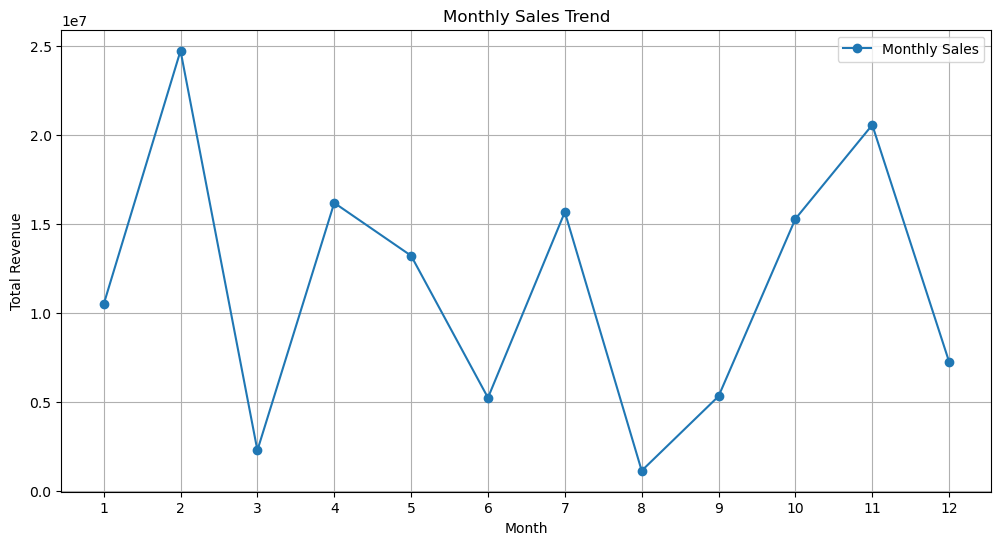

In [16]:
#visualization for monthly trends

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'],monthly_sales['Total Revenue'],marker='o', label='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trend')
plt.xticks(monthly_sales['Month'])
plt.legend()
plt.grid(True)
plt.show()

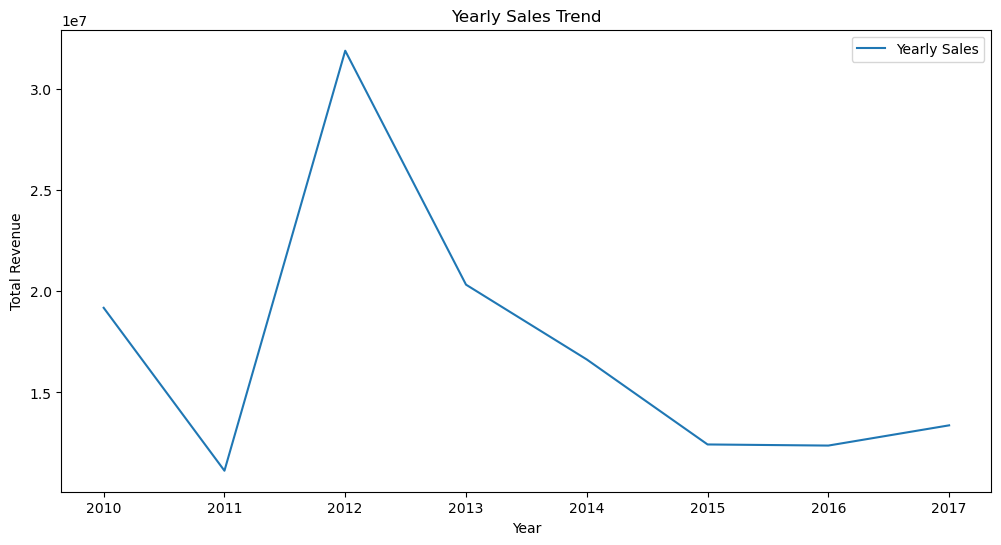

In [17]:
# Visualization for yearly trends

plt.figure(figsize=(12,6))
plt.plot(yearly_sales['Year'],yearly_sales['Total Revenue'], label='Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Sales Trend')
plt.xticks(yearly_sales['Year'])
plt.legend()
plt.show()

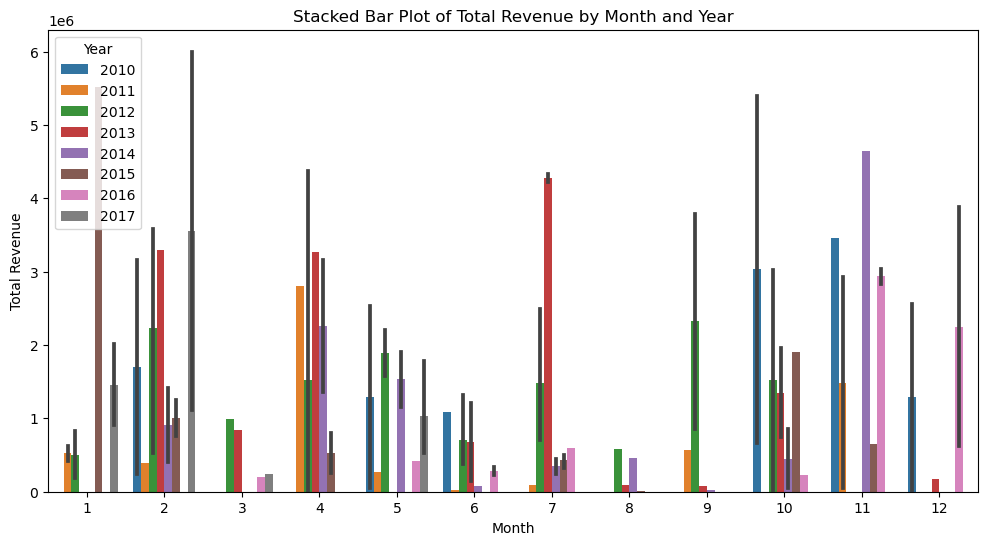

In [18]:
# Visualization for yearly-monthly trends

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Total Revenue', hue='Year')

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Stacked Bar Plot of Total Revenue by Month and Year')
plt.legend(title='Year')
plt.show()

In [19]:
# Exporting DataFrame to CSV file for Amazon Featured Data

df.to_csv('Amazon Featured Data.csv')